Nama : Erin Nur Fatimah

ID : M515Y1092

Path : Machine Learning dan Front-End (M02)

Email : 203110024@students.akakom.ac.id

Alamat : Sindet RT 003, Wukirsari, Imogiri, Bantul, Yogyakarta


In [29]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
#mengimport library pada google colab
import tensorflow as tf
import warnings
import numpy as np
import glob 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from google.colab import files

In [46]:
import os
train_dir = "/content/drive/MyDrive/data set/data set proyek 2/flowers"
dir_daisy = os.path.join("/content/drive/MyDrive/data set/data set proyek 2/flowers/daisy")
dir_dandelion = os.path.join("/content/drive/MyDrive/data set/data set proyek 2/flowers/dandelion")
dir_rose= os.path.join("/content/drive/MyDrive/data set/data set proyek 2/flowers/rose")
dir_sunflower= os.path.join("/content/drive/MyDrive/data set/data set proyek 2/flowers/sunflower")
dir_tulip= os.path.join("/content/drive/MyDrive/data set/data set proyek 2/flowers/tulip")

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers/daisy')))
print(len(os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers/dandelion')))
print(len(os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers/rose')))
print(len(os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers/sunflower')))
print(len(os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers/tulip')))

764
1052
784
733
984


In [32]:
os.listdir('/content/drive/MyDrive/data set/data set proyek 2/flowers')

['dandelion', 'sunflower', 'rose', 'tulip', 'daisy']

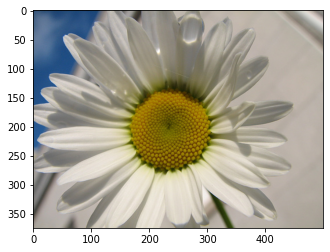

In [34]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = image.load_img('/content/drive/MyDrive/data set/data set proyek 2/flowers/daisy/286875003_f7c0e1882d.jpg')
imgplot = plt.imshow(img)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_dir = os.path.join('/content/drive/MyDrive/data set/data set proyek 2/flowers')
#augmentasi data gambar
Train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) 

Validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = "nearest",
    validation_split = 0.2
)

In [49]:
Train_generator = Train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
Validation_generator = Train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [48]:
Model = Sequential(
    [
     Conv2D(32, (3,3), strides = (1,1), activation = 'relu' , input_shape = (150,150,3)),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(64, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Conv2D(128, (3,3), strides = (1,1), activation = 'relu' ),
     MaxPooling2D(pool_size = (2,2), padding = 'valid'),
     Flatten(),
     Dropout(0.2),
     Dense(128, activation = 'relu'),
     Dense(5, activation='softmax')
    ]
)

In [ ]:
Adam(learning_rate=0.00146, name='Adam')
Model.compile(
              optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [42]:
#menggunakan callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.80 and logs.get('val_accuracy')>0.80):
      print("Akurasi mencapi 80% lebih")
      self.model.stop_training = True
callbacks = myCallback()

In [19]:
with tf.device("/device:GPU:0"):
  history = Model.fit(
                    Train_generator, 
                    epochs =  300, 
                    steps_per_epoch = 1751//16, 
                    validation_data = Validation_generator, 
                    verbose = 1, 
                    validation_steps = 437//16,
                    callbacks=[callbacks]
                    )

Epoch 1/300
109/109 [==============================] - 85s 778ms/step - loss: 0.2772 - accuracy: 0.9057 - val_loss: 1.4319 - val_accuracy: 0.7245
Epoch 2/300
109/109 [==============================] - 85s 777ms/step - loss: 0.2348 - accuracy: 0.9115 - val_loss: 1.2412 - val_accuracy: 0.7523
Epoch 3/300
109/109 [==============================] - 85s 776ms/step - loss: 0.2326 - accuracy: 0.9146 - val_loss: 0.9955 - val_accuracy: 0.7523
Epoch 4/300
109/109 [==============================] - 87s 797ms/step - loss: 0.2632 - accuracy: 0.9037 - val_loss: 1.1506 - val_accuracy: 0.7292
Epoch 5/300
109/109 [==============================] - 84s 771ms/step - loss: 0.2157 - accuracy: 0.9231 - val_loss: 1.1923 - val_accuracy: 0.6968
Epoch 6/300
109/109 [==============================] - 85s 777ms/step - loss: 0.2148 - accuracy: 0.9260 - val_loss: 1.4005 - val_accuracy: 0.7338
Epoch 7/300
109/109 [==============================] - 85s 774ms/step - loss: 0.2096 - accuracy: 0.9254 - val_loss: 1.5725 -

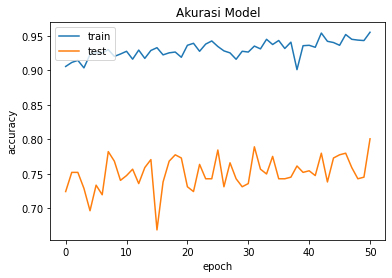

In [21]:
#plot terhadap akurasi model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

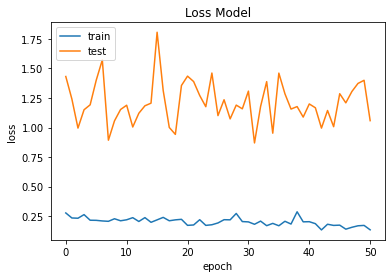

In [22]:
#plot terhadap loss model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
#Menyimpan model ke dalam format TF-Lite
warnings.filterwarnings('ignore')
converter = tf.lite.TFLiteConverter.from_keras_model(Model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('Flowers_Erin.tflite', 'wb') as f:
  f.write(tflite_model)